In [2]:
import numpy as np
import pandas as pd

In [3]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubh123a3","key":"143c4205664406d6b07675145a9db1b8"}'}

In [5]:

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d sriharshaeedala/financial-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset
License(s): CC-BY-SA-4.0
financial-fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip financial-fraud-detection-dataset.zip

Archive:  financial-fraud-detection-dataset.zip
replace Synthetic_Financial_datasets_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
df=pd.read_csv('/content/Synthetic_Financial_datasets_log.csv')

In [10]:
df.shape

(6362620, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
df.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3795448,281,CASH_OUT,91167.77,C423792557,51130.4,0.0,C441571776,380643.82,471811.58,0,0


In [13]:
num=['step','amount','oldbalanceOrg','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']
cat=['nameOrig','nameDest','type']

In [14]:
df.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5471514,379,PAYMENT,11043.36,C1349004156,0.0,0.0,M1706578704,0.0,0.0,0,0


In [15]:
df[num].corr()['isFlaggedFraud']

,isFlaggedFraud
step,0.003277
amount,0.012295
oldbalanceOrg,0.003835
oldbalanceDest,-0.000513
newbalanceDest,-0.000529
isFraud,0.044109
isFlaggedFraud,1.000000


<Axes: xlabel='isFlaggedFraud'>

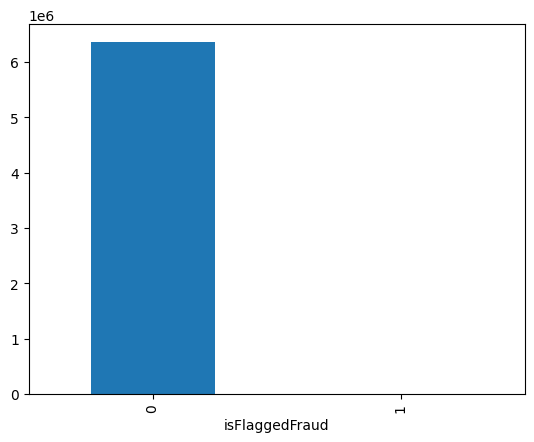

In [16]:
df['isFlaggedFraud'].value_counts().plot(kind='bar')

In [17]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [18]:
#df.drop('isFlaggedFraud',inplace=True,axis=1)

In [19]:
df.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
601386,34,CASH_IN,577374.2,C1455629107,3433709.0,4011083.2,C1000124976,1653607.26,1076233.06,0,0


In [20]:
df.drop(['nameOrig','nameDest'],inplace=True,axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [22]:
#import seaborn as sns


In [23]:
#sns.pairplot(df,hue='isFraud')

In [24]:
x=df.drop('isFraud',axis=1)
y=df.iloc[:,-2]

In [25]:
y

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
6362615,1
6362616,1
6362617,1
6362618,1


In [26]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5090096 entries, 6271196 to 1692743
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 349.5+ MB


In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [1]),  # Apply OneHotEncoder to the first column (index 0)
        ('scaler', StandardScaler(), [0,2,3,4,5,6,7])  # Apply StandardScaler to the other columns
    ],
    remainder='passthrough'  # Leave the rest of the columns as is
)

In [30]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [31]:
x_train_trans = pipeline.fit_transform(X_train)
x_test_trans = pipeline.transform(X_test)

In [32]:
smote = SMOTE(random_state=42)
x_train_trans, y_train_resampled = smote.fit_resample(x_train_trans, y_train)

In [38]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dropout,Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
model=Sequential()
model.add(Dense(12,activation='sigmoid',input_dim=12 ))
model.add(BatchNormalization())
model.add(Dense(8,activation='sigmoid'  ))
model.add(Dropout(0.2))
model.add(Dense(4,activation='sigmoid'  ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'  ))


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12)                  │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 32 (128.00 B)

In [41]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=4,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [46]:
history=model.fit(x_train_trans,y_train_resampled,validation_data=(x_test_trans, y_test),batch_size=512,epochs=100,validation_split=0.2,verbose=1,callbacks=callback)

Epoch 1/100
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - accuracy: 0.9824 - loss: 0.0578 - val_accuracy: 0.9958 - val_loss: 0.0120
Epoch 2/100
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 140s 4ms/step - accuracy: 0.9850 - loss: 0.0517 - val_accuracy: 0.9922 - val_loss: 0.0206
Epoch 3/100
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9861 - loss: 0.0485 - val_accuracy: 0.9925 - val_loss: 0.0181
Epoch 4/100
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 142s 4ms/step - accuracy: 0.9869 - loss: 0.0461 - val_accuracy: 0.9930 - val_loss: 0.0172
Epoch 5/100
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 140s 4ms/step - accuracy: 0.9876 - loss: 0.0443 - val_accuracy: 0.9949 - val_loss: 0.0131
Epoch 5: early stopping


In [55]:
df['oldbalanceOrg'].max()

59585040.37

In [52]:
df.sample()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
422675,18,CASH_OUT,169382.06,0.0,0.0,6327348.09,6496730.15,0,0


In [54]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [60]:
!pip install pickle


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [61]:
import pickle
pickle.dump(pipeline,open('preprocessor.pkl','wb'))

In [62]:
model.save('my_model.h5')

In [63]:
import tensorflow as tf
print(tf.__version__)


2.17.0
